In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# EDA
del df['PassengerId']
del df['Name']

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
del df['Cabin']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
# column 40 % nulls delete it
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [9]:
df.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


replace data types

In [10]:
# let's convert the columns to category
df['SibSp']=df['SibSp'].astype('object')
df['Survived']=df['Survived'].astype('object')
df['Pclass']=df['Pclass'].astype('object')
df['Parch']=df['Parch'].astype('object')
df['Embarked']=df['Embarked'].astype('object')


delete un important feature

In [11]:
del df['Ticket']

In [12]:
df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [13]:
new_df=df.copy()

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# check and impute the nulls

In [ ]:
Age and Embarked has null values

In [15]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Age'].fillna(0,inplace=True)

In [18]:
df['Embarked'].fillna('S',inplace=True)

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
the data became clean

In [20]:
continous_features=list(df.describe().columns)

In [21]:
df.describe(include="O")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,891
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,646


Pclass


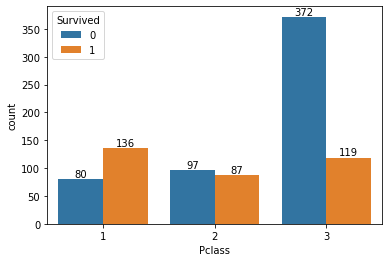

Sex


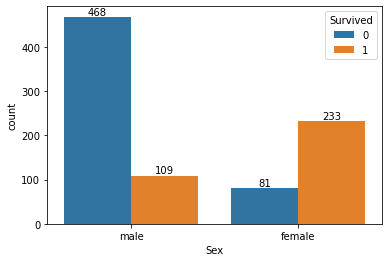

SibSp


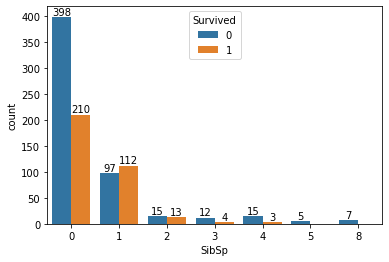

Parch


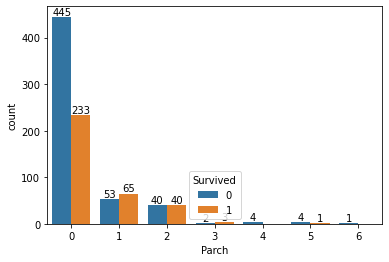

Embarked


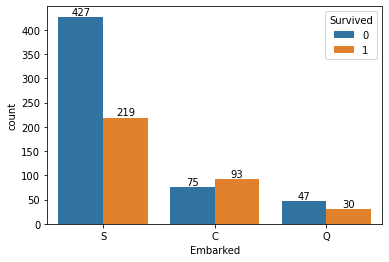

In [22]:
for column in df.loc[: ,~df.columns.isin(["Survived","Age","Fare"])]:
                     
    print(column)
    ax= sns.countplot(df[column],hue=df.Survived)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.show()
    print('=================')
    

In [23]:
mask=df['Age']<50
df[mask]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,0.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


find the survived according to each age

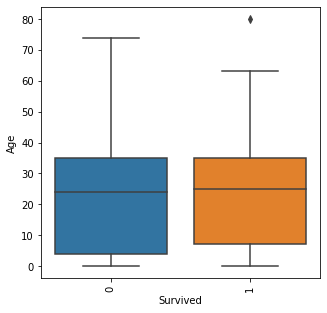

In [24]:
df1=df
plt.figure(figsize=(5,5))
chart=sns.boxplot(x='Survived',y='Age',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);


Note that ages fro 5 to 35 its the most ages used 

--according to type of class the survived are higher in class3

--the female have chance to survived more than male
--the alone passanger have chance to be survived more than person who have siplings 


In [ ]:
# observations:
1- need to convert some columns into category(parch,sibsp,)
2- around 60 % are not survived
3- most of the people was traveling alone
4- most the of the people was travel on class 3

In [25]:
df.describe()

,Age,Fare
count,891.000000,891.000000
mean,23.799293,32.204208
std,17.596074,49.693429
min,0.000000,0.000000
25%,6.000000,7.910400
50%,24.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [26]:
df.describe(include='O')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,891
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,646


In [27]:
continous_features=list(df.describe().columns)
categorical_features=list(df.describe(include='O').columns)

Age


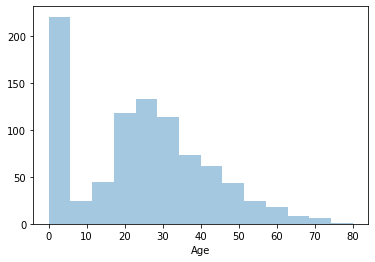

Fare


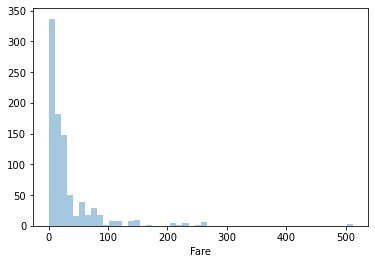

In [28]:
# for the continous features let's use some plot
for column in continous_features:
    print(column)
    sns.distplot(df[column],kde=False)
    plt.show()

In [29]:
condition=df['Fare']<10
df[condition]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,0.0,0,0,8.4583,Q
12,0,3,male,20.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,0.0,0,0,7.8958,S
881,0,3,male,33.0,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


Age


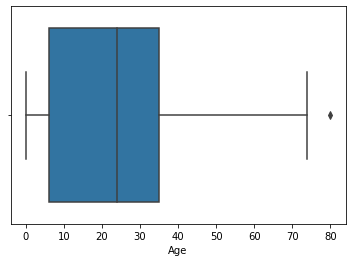

Fare


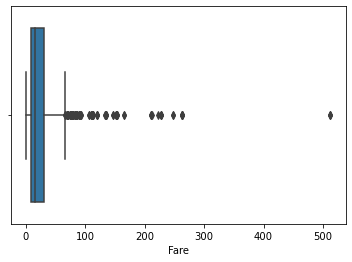

In [30]:
for column in continous_features:
    print(column)
    sns.boxplot(df[column])
    plt.show()

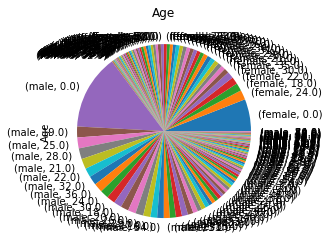

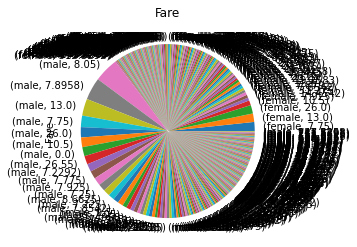

In [31]:
for column in continous_features:
    df.groupby('Sex')[column].value_counts().plot(kind='pie')
    plt.title(column)
    plt.show()

In [ ]:
# prepare the dataset into machine learning

In [ ]:
we gather data

In [ ]:
we also replace types set each column in suitable type

In [ ]:
and also check nulss and impute it

In [ ]:
now we will make 

In [ ]:
# feature selection

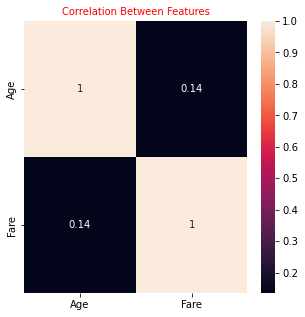

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Between Features",fontsize=10,color="red");



In [100]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fare        891 non-null    float64
 1   Embarked    891 non-null    int32  
 2   Pclass_2    891 non-null    uint8  
 3   Pclass_3    891 non-null    uint8  
 4   Parch_1     891 non-null    uint8  
 5   Parch_2     891 non-null    uint8  
 6   Parch_3     891 non-null    uint8  
 7   Parch_4     891 non-null    uint8  
 8   Parch_5     891 non-null    uint8  
 9   Parch_8     891 non-null    uint8  
 10  Embarked_1  891 non-null    uint8  
 11  Embarked_2  891 non-null    uint8  
 12  Embarked_3  891 non-null    uint8  
 13  Embarked_4  891 non-null    uint8  
 14  Embarked_5  891 non-null    uint8  
 15  Embarked_6  891 non-null    uint8  
dtypes: float64(1), int32(1), uint8(14)
memory usage: 22.7 KB


In [ ]:
# Make OHE for the features

In [34]:
df=pd.get_dummies(df,categorical_features,drop_first=True)
df

,Age,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,19.0,30.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,0.0,23.4500,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,26.0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
X=df.drop('Survived_1',axis=1)

In [36]:
y=df['Survived_1']

<AxesSubplot:xlabel='Survived_1', ylabel='count'>

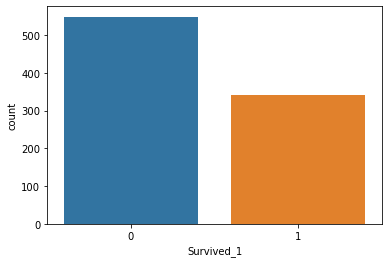

In [37]:
sns.countplot(y)

# make scaling for x features

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
# make splitting for the data set

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [ ]:
# make model selection

i will use logistic regression because it deal with binary classification

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_train_pred=lg.predict(X_train)
y_pred=lg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80       106
           1       0.75      0.56      0.64        73

    accuracy                           0.74       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.74      0.74      0.74       179

[[92 14]
 [32 41]]


we will convert imalanced dataset into  balanced

In [43]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote ,y_train_smote=smote.fit_resample(X_train,y_train)

In [44]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train_smote,y_train_smote)
y_train_pred=lg.predict(X_train_smote)
y_pred=lg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       106
           1       0.71      0.73      0.72        73

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

[[84 22]
 [20 53]]


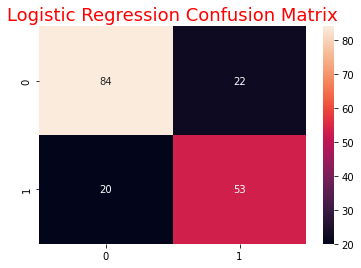

In [45]:
sns.heatmap(confusion_matrix(y_test, lg.predict(X_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

In [48]:
# poc proof of concept
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

training accuracy 0.8386004514672686
testing accuracy 0.770949720670391
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.75      0.66      0.70        73

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179

[[90 16]
 [25 48]]


there is an overfitting

In [49]:
# it is fast,simple and easy algorithm it deal with numeric and text dataset
from sklearn.ensemble import AdaBoostClassifier
adabos=AdaBoostClassifier(n_estimators=100)
adabos.fit(X_train_smote,y_train_smote)
y_pred=adabos.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       106
           1       0.71      0.73      0.72        73

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [50]:
# bagging 
# making parts of the data and make testing for partial of the data
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train_smote,y_train_smote)
y_train_pred=model.predict(X_train_smote)
print('training accuracy',accuracy_score(y_train_pred,y_train_smote))
y_pred=model.predict(X_test)
print('testing accuracy',accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

training accuracy 0.9887133182844243
testing accuracy 0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       106
           1       0.74      0.67      0.71        73

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

[[89 17]
 [24 49]]


there is an overfitting because its asmaple data
solution----
1- we must increase model complixity
2-increase the data